### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [9]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), 
("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]



In [10]:
edad_altura = pd.DataFrame (lista_alumnos)

In [11]:
edad_altura.rename(columns={ edad_altura.columns[0]: 'Nombre', edad_altura.columns[1]: 'Edad', edad_altura.columns[2]: 'Altura' }, inplace = True)


In [12]:
edad_altura.dtypes

Nombre     object
Edad        int64
Altura    float64
dtype: object

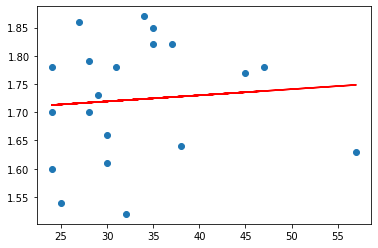

In [13]:
X = edad_altura.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = edad_altura.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [15]:
# Errores del modelo. % de aciertos

linear_regressor.score(X,Y)*100

0.758680227148234

In [18]:
# secante
linear_regressor.intercept_

array([1.68685622])

In [19]:
# pendiente
linear_regressor.coef_



array([[0.00108011]])

In [27]:
from sklearn import metrics

In [29]:
print ('MAE:', metrics.mean_absolute_error(Y_pred, linear_regressor))
print ('MSE:', metrics.mean_squared_error(Y_pred, linear_regressor))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(Y_pred, linear_regressor)))

TypeError: Expected sequence or array-like, got <class 'sklearn.linear_model._base.LinearRegression'>

<AxesSubplot:>

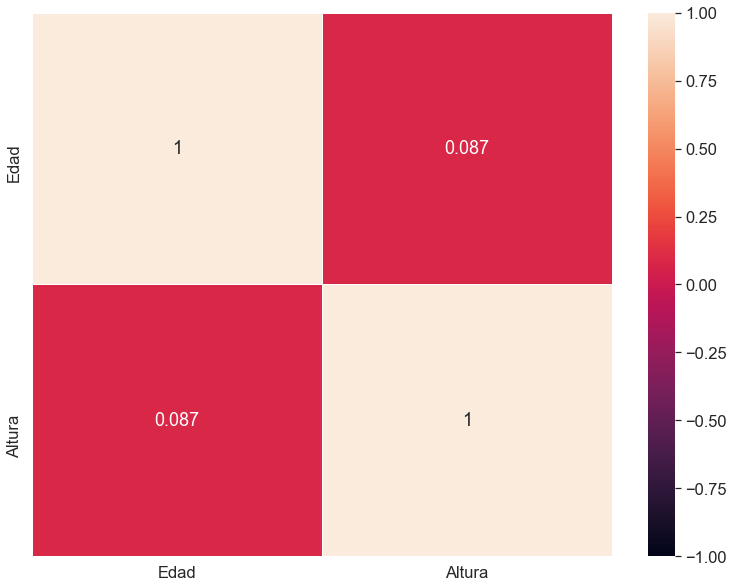

In [51]:
# matriz de correlación
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(edad_altura.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)
           
# LOS DATOS NO ESTÁN CORRELACIONADOS


In [52]:
# ALTURA MULTPLICADA POR DOS
edad_altura['Altura'] = edad_altura['Altura']*2

In [53]:
Altura=edad_altura


<AxesSubplot:>

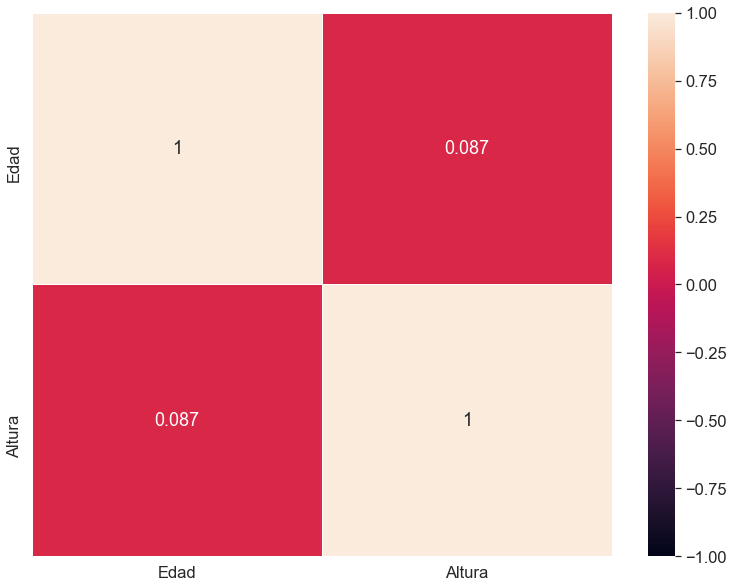

In [54]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(Altura.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

# NO VARÍA LA CORRELACIÓN

In [55]:
edad_altura['Edad'] = edad_altura['Edad']*2

In [56]:
Edad = edad_altura

<AxesSubplot:>

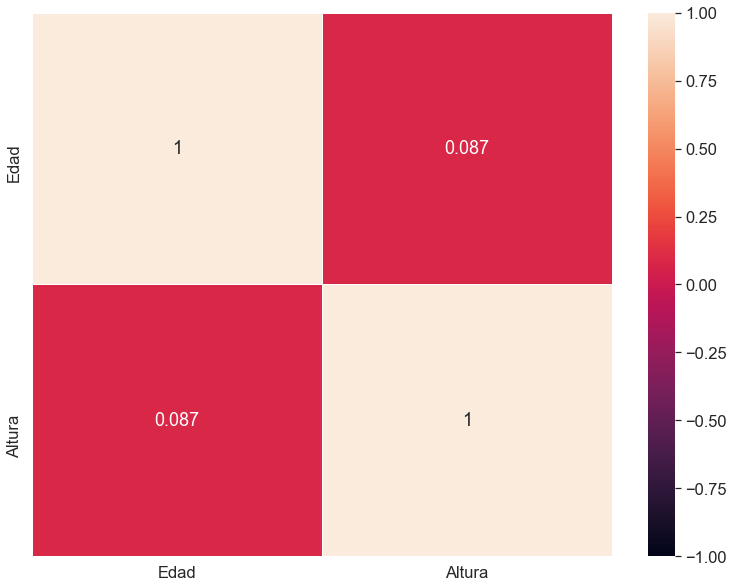

In [57]:
plt.subplots(figsize=(13, 10))
sns.set(font_scale=1.5)
sns.heatmap(Edad.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

# NO VARÍA LA CORRELACIÓN

Text(0, 0.5, 'Altura')

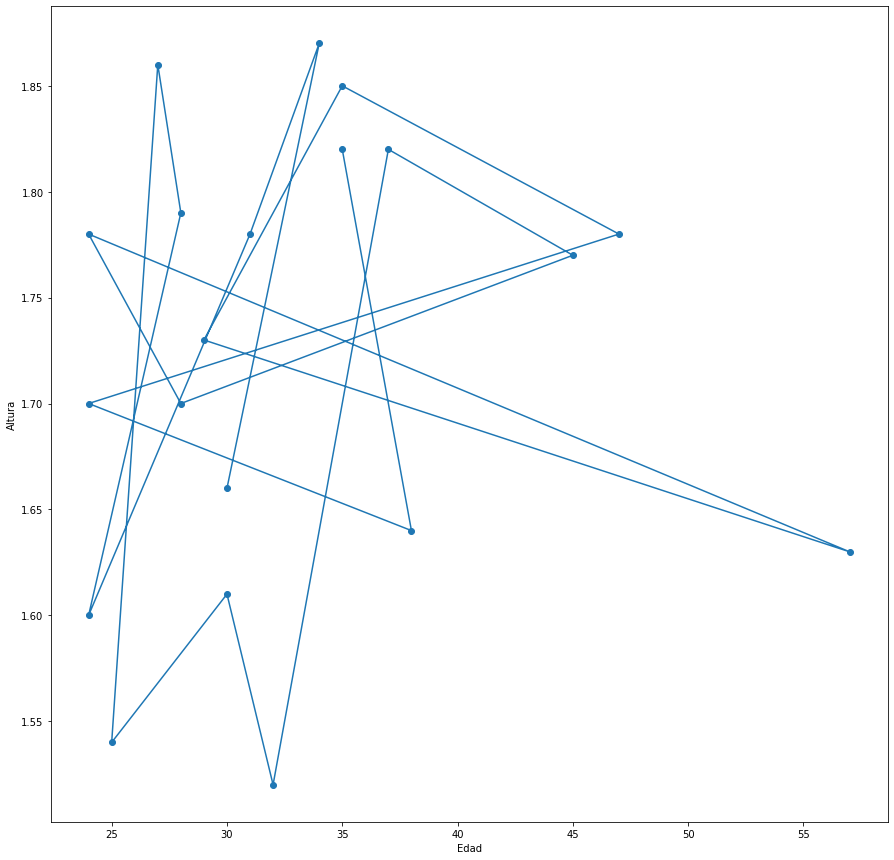

In [7]:
fig = plt.figure(figsize =(15,15))
plt.scatter(edad_altura['Edad'], edad_altura['Altura'])
plt.plot(edad_altura['Edad'], edad_altura['Altura'])
plt.xlabel('Edad')
plt.ylabel ('Altura')
